<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Nicolae_Dubenco_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

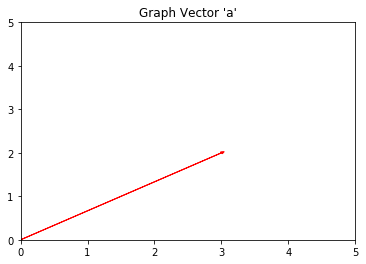

In [6]:
a = [3, 2]

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=.05, color ='r')
plt.xlim(0,5)          
plt.ylim(0,5)
plt.title("Graph Vector 'a'")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


Norm of a vector represents a total size or length of all vectors in a vector space or matrix

In [7]:
b = np.array([17, -4, -2, 1])

b_norm = np.linalg.norm(b)
b_norm

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
np.dot(c,d)

42

The vectors are not orthogonal because their dot product must be zero. 0 != 42 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
e = np.array([[7, 4, 2],
             [1, 3, -1],
             [2, 6, -4]])

np.linalg.inv(e)  # inverse

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [11]:
e.T  # transpose

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [60]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [61]:
##### Your Code Here #####
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [62]:
customers_mean = 1135.714286
customers_standard_deviation = 314.264069
customers_variance = customers_standard_deviation ** 2
print('customers_variance =', customers_variance)

snow_mean = 2.714286
snow_standard_deviation = 2.927700
snow_variance = snow_standard_deviation ** 2
print('snow_variance =', snow_variance)

customers_variance = 98761.90506443677
snow_variance = 8.57142729


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#  Yes, but the variance values are wildly different and difficult to do.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [63]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [64]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [28]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [29]:
##### Your Code Here #####
data_df = df.loc[:, 'Cheese':'Confectionery'].values
data_df

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

In [30]:
standardized_data_df = StandardScaler().fit_transform(data_df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
standardized_data_df

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [32]:
##### Your Code Here #####
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data_df)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component1', 'principal_component2'])
principal_df

,principal_component1,principal_component2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


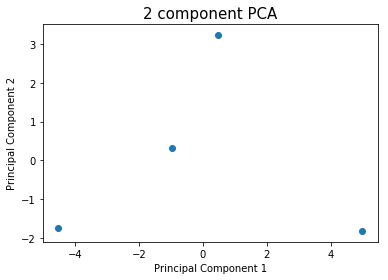

In [58]:
plt.scatter(principal_df['principal_component1'], principal_df['principal_component2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA', fontsize=15)
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [41]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


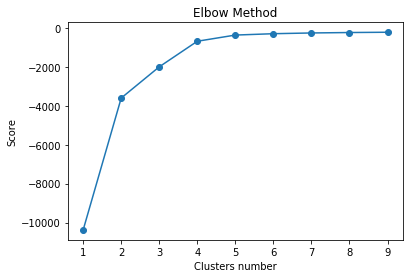

In [47]:
no_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in no_clusters]
score = [kmeans[i].fit(points).score(points) for i in range(len(kmeans))]

plt.plot(no_clusters, score, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

### 4 Clusters

In [48]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 0 0 3 0 0 3 3 2 0 0 0 0 0 3 0 3 0 0 1 3 1 1 1 0 0 0 2 0 0 0 0 0 1 0 0 0
 0 2 0 0 1 2 2 2 0 0 0 3 0 1 3 3 2 1 0 0 2 2 3 1 0 3 2 1 2 1 2 3 2 0 0 0 0
 1 1 0 0 2 1 2 0 0 0 2 0 2 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 3 0 0 1 3 3 3 1 0
 1 0 3 0 0 2 2 1 2 1 0 0 3 0 3 0 1 2 3 0 3 0 3 2 2 0 1 3 0 2 0 0 1 0 2 0 2
 3 0 0 0 3 1 0 2 0 1 0 3 0 0 2 3 1 1 0 2 0 0 3 0 2 1 0 0 0 0 0 3 0 0 0 0 0
 0 3 1 2 0 0 3 1 3 0 2 1 1 0 0]


In [49]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


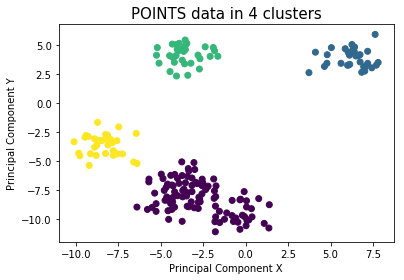

In [55]:
plt.scatter(points['x'], points['y'], c=points['clusters'])
plt.xlabel('Principal Component X')
plt.ylabel('Principal Component Y')
plt.title('POINTS data in 4 clusters', fontsize=15)
plt.show()

### 5 Clusters

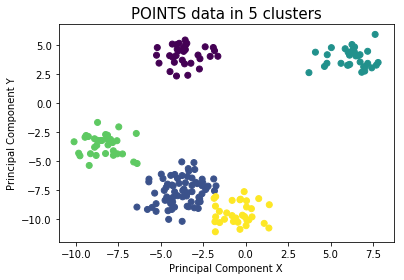

In [56]:
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(points)
labels1 = kmeans1.labels_

new_series1 = pd.Series(labels1)
n5clusters = new_series1.values

plt.scatter(points['x'], points['y'], c=n5clusters)
plt.xlabel('Principal Component X')
plt.ylabel('Principal Component Y')
plt.title('POINTS data in 5 clusters', fontsize=15)
plt.show()